 ## **COVID19 Prediction**

Q. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  



The significance of proposing a COVID-19 prediction system in today's world lies in the widespread impact of the disease on a global scale. With its rapid transmission and severe consequences, early detection becomes crucial for effective containment. By accurately predicting the onset of the disease, we can implement timely preventive measures, adhere to necessary guidelines, and optimize medical treatments. Early identification facilitates more efficient and targeted medical interventions, reducing the severity of the illness and minimizing the need for extensive medication. Utilizing advanced medical technologies and reliable prediction models ensures a proactive approach in managing patient care, ultimately contributing to better outcomes and cost optimization.

Q How is it going to impact the medical field when it comes to effective screening and reducing health care burden.

The implementation of an accurate disease prediction system, such as for COVID-19, will have a profound impact on the medical field by revolutionizing effective screening processes and alleviating healthcare burdens. Firstly, the ability to predict diseases early enables proactive screening initiatives, allowing healthcare providers to identify potential cases swiftly. This early detection not only facilitates timely intervention but also aids in the containment of the disease, preventing its further spread within the community.

Moreover, the reduction of healthcare burdens is evident in several ways. Early prediction leads to more targeted and efficient use of medical resources, optimizing the allocation of personnel, equipment, and facilities. By streamlining screening processes, unnecessary diagnostic procedures can be minimized, reducing the strain on healthcare infrastructure and personnel. Additionally, the proactive nature of disease prediction contributes to preventive measures, potentially curbing the progression of diseases and mitigating the need for extensive and costly treatments.

In essence, an effective disease prediction system significantly transforms the medical landscape by enhancing screening efficacy, curbing the spread of diseases, and ultimately alleviating the burdens on healthcare systems, resulting in improved patient outcomes and resource utilization.

Q. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.

The proposed disease prediction method addresses a critical gap in current knowledge by providing a proactive approach to early detection. The gap lies in the limitations of traditional healthcare systems, which often rely on reactive measures rather than predictive strategies. This method, built on advanced technologies and accurate prediction models, can be adaptable for future diseases with similar characteristics. By leveraging machine learning and data analytics, the proposed method can be tailored to various diseases, aiding in their early identification and containment.

# **Initial Hypothesis **

Based on the dataset presented, which contains variables such as Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, and Known_contact, we may construct the following initial hypothesis:

Hypothesis 1: Patients who came in direct contact with Confirmed (Covid Positive) Patients are more likely to be Corona positive.

This hypothesis argues that persons who have had close interaction with proven COVID-19 positive patients are at a higher risk of being infected themselves. The belief is that the virus spreads mostly through close proximity and direct contact with infected individuals. By studying the variable "Known_contact" in the dataset, we may analyse whether there is a correlation between known contact with COVID-19 positive patients and the likelihood of testing positive for the virus.

Hypothesis 2: Shortness_of_breath, Fever, and Cough_symptoms are essential variables in determining COVID-19 positive or negative cases.

This theory indicates that symptoms such as shortness of breath, fever, and cough are crucial indications in diagnosing COVID-19 positive cases. These symptoms are typically connected with respiratory infections and have been recognised as major symptoms of COVID-19. By evaluating the variables "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset, we may study the association between these symptoms and the possibility of a person being COVID-19 positive or negative.

It is crucial to highlight that these are initial hypotheses based on the available dataset, and further analysis and modeling will be required to test these assumptions and find further insights related to COVID-19 prediction.

## **Data Analysis Approach**

In [3]:
# importing necessaary Library
!pip install feature_engine
import numpy as np
import pandas as pd
from feature_engine.imputation import CategoricalImputer
import matplotlib.pyplot as plt



In [4]:
# reading the dataset
data_read = pd.read_csv("/content/corona_tested_006.csv")

<ipython-input-4-792e208b7e4e>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_read = pd.read_csv("/content/corona_tested_006.csv")


In [5]:
# Create a copy of dataframe ,so that original data remain unaffected
df = data_read.copy()

In [6]:
# checking the first 5 data
df.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

In [7]:
# checking the last 5 data
df.tail()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat  \
278843  278844  30-04-2020          False  False       False   
278844  278845  30-04-2020          False  False       False   
278845  278846  30-04-2020          False  False       False   
278846  278847  30-04-2020          False  False       False   
278847  278848  30-04-2020          False  False       False   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
278843               False    False  positive         None    male   
278844               False    False  negative         None  female   
278845               False    False  negative         None    male   
278846               False    False  negative         None    male   
278847               False    False  negative         None  female   

       Known_contact  
278843         Other  
278844         Other  
278845         Other  
278846         Other  
278847         Other

In [8]:
# checking the shape of data
df.shape

(278848, 11)

We have 11 different feature present in our dataset

In [9]:
# get info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


As we can see above all the data type are of object type

In [10]:
df.describe()

Ind_ID
count  278848.000000
mean   139424.500000
std     80496.628269
min         1.000000
25%     69712.750000
50%    139424.500000
75%    209136.250000
max    278848.000000

As we have only one numerical data type it give the statistics of that particular column

In [11]:
df.describe(include= "all")

Ind_ID   Test_date Cough_symptoms   Fever Sore_throat  \
count   278848.000000      278848         278848  278848      278848   
unique            NaN          51              5       5           5   
top               NaN  20-04-2020          False   False       False   
freq              NaN       10921         127531  137774      212584   
mean    139424.500000         NaN            NaN     NaN         NaN   
std      80496.628269         NaN            NaN     NaN         NaN   
min          1.000000         NaN            NaN     NaN         NaN   
25%      69712.750000         NaN            NaN     NaN         NaN   
50%     139424.500000         NaN            NaN     NaN         NaN   
75%     209136.250000         NaN            NaN     NaN         NaN   
max     278848.000000         NaN            NaN     NaN         NaN   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
count               278848   278848    278848       278848  278848   
unique                   5        5         3            3       3   
top                  False    False  negative         None  female   
freq                212842   212326    260227       127320  130158   
mean                   NaN      NaN       NaN          NaN     NaN   
std                    NaN      NaN       NaN          NaN     NaN   
min                    NaN      NaN       NaN          NaN     NaN   
25%                    NaN      NaN       NaN          NaN     NaN   
50%                    NaN      NaN       NaN          NaN     NaN   
75%                    NaN      NaN       NaN          NaN     NaN   
max                    NaN      NaN       NaN          NaN     NaN   

       Known_contact  
count         278848  
unique             3  
top            Other  
freq          242741  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

As we use include =all method it give the stats of all the columns or feature that are present in the dataset.

let's check if our dataset has null value or not

In [12]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [13]:
# getting list of column name
df_column_names = list(df)
df_column_names

['Ind_ID',
 'Test_date',
 'Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Corona',
 'Age_60_above',
 'Sex',
 'Known_contact']

In [14]:
# check for duplicate value
df.duplicated().sum()

0

As we have null value on categorical features we are using categorical imputer form feature engine imputation library that help us to fill the Null vlaue with either 'missing','frequent' value that are presnet in the features.



Attaching Link for reference:

https://feature-engine.trainindata.com/en/latest/api_doc/imputation/


In [15]:
c_imp = CategoricalImputer(imputation_method='frequent')
df = c_imp.fit_transform(df)

In [16]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [17]:
# checking the different type of value in each features
for col in df:
  print("---- %s ---" % col)
  print(df[col].unique())

---- Ind_ID ---
[     1      2      3 ... 278846 278847 278848]
---- Test_date ---
['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
---- Cough_symptoms ---
['TRUE' 'FALSE' 'None' False True]
---- Fever ---
['FALSE' 'TRUE' 'None' False True]
---- Sore_throat ---
['TRUE' 'FALSE' 'None' False True]
---- Shortness_of_breath ---
['FALSE' 'TRUE' 'None' False True]
---- Headache

If we see unique value in each cols we can see for column other than ID and date, we have similar value with different presentation like
True and 'True' on is boolean and other is in string format, so for that
we have to convert into one then look for the column that have none in it

In [18]:
# Replacing True False string value to True , False
df[df_column_names[2:7]] = df[df_column_names[2:7]].replace('TRUE',True)
df[df_column_names[2:7]] = df[df_column_names[2:7]].replace('FALSE',False)

In [19]:
for col in df:
  print("---- %s ---" % col)
  print(df[col].unique())

---- Ind_ID ---
[     1      2      3 ... 278846 278847 278848]
---- Test_date ---
['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
---- Cough_symptoms ---
[True False 'None']
---- Fever ---
[False True 'None']
---- Sore_throat ---
[True False 'None']
---- Shortness_of_breath ---
[False True 'None']
---- Headache ---
[False True 'None']
---- Corona ---
['negative' 'positi

In [20]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- Ind_ID ---
1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: Ind_ID, Length: 278848, dtype: int64
---- Test_date ---
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020

In [21]:
# for cough symptoms we first filter None value then replace it either True or False randomly
none_values = df['Cough_symptoms'] == 'None'
unique_values = df.loc[~none_values,'Cough_symptoms'].unique()
df['Cough_symptoms'].replace('None',np.random.choice(unique_values), inplace=True)
#print(np.random.choice(unique_values))


In [22]:
df['Cough_symptoms'].value_counts()

False    236368
True      42480
Name: Cough_symptoms, dtype: int64

In [23]:
# for Fever column we will do same
fever_none = df['Fever']=='None'
fever_unique_values = df.loc[~ fever_none,'Fever'].unique()
#print(fever_unique_values)
df['Fever'].replace('None',np.random.choice(unique_values), inplace=True)


In [24]:
df['Fever'].value_counts()

False    256844
True      22004
Name: Fever, dtype: int64

In [25]:
# Sore_throat columns
sore_none = df['Sore_throat']=='None'
sore_unique_values = df.loc[~sore_none,'Sore_throat'].unique()
df['Sore_throat'].replace('None',np.random.choice(sore_unique_values),inplace = True)

In [26]:
df['Sore_throat'].value_counts()

False    276922
True       1926
Name: Sore_throat, dtype: int64

In [27]:
# Shortness_of_breath
short_none = df['Shortness_of_breath'] == 'None'
short_unique_values = df.loc[~short_none, 'Shortness_of_breath'].unique()
df['Shortness_of_breath'].replace('None',np.random.choice(short_unique_values), inplace = True)

In [28]:
df['Shortness_of_breath'].value_counts()

False    277270
True       1578
Name: Shortness_of_breath, dtype: int64

In [29]:
# Headache
head_none  = df['Headache'] == 'None'
head_unique_values = df.loc[~head_none,'Headache'].unique()
df['Headache'].replace('None', np.random.choice(head_unique_values), inplace = True)

In [30]:
df['Headache'].value_counts()

False    276433
True       2415
Name: Headache, dtype: int64

In [31]:
 # Corona
 covid_none = df['Corona'] == 'other'
 covid_unique_values = df.loc[~covid_none,'Corona'].unique()
 df['Corona'].replace('other',np.random.choice(covid_unique_values), inplace = True)


In [32]:
df['Corona'].value_counts()

negative    264119
positive     14729
Name: Corona, dtype: int64

In [33]:
# Age_60_above
age_none  = df['Age_60_above'] == 'None'
age_unique_values = df.loc[~age_none, 'Age_60_above'].unique()
df['Age_60_above'].replace('None' , np.random.choice(age_unique_values), inplace = True)

In [34]:
df['Age_60_above'].value_counts()

No     253023
Yes     25825
Name: Age_60_above, dtype: int64

In [35]:
# Sex
sex_none = df['Sex'] == 'None'
sex_unique_values = df.loc[~sex_none , 'Sex'].unique()
df['Sex'].replace('None', np.random.choice(sex_unique_values), inplace = True)

In [36]:
df['Sex'].value_counts()

male      148690
female    130158
Name: Sex, dtype: int64

In [37]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

As above we have converted all 'None' and 'Other to random other unique value that are present in the same columns.


## **EDA**

In [38]:
import plotly.express as px
import seaborn as sns

In [39]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [40]:
# checking the ratio of male and female
px.histogram(df, x="Sex", color="Sex",width=500, height=400, title= 'Gender')

In [41]:
# checking the covid ratio

px.histogram(df, x="Corona", color="Corona",width=500, height=400, title= 'Covid Distribution')


In [42]:
# checking the ratio of male and female who have suffered more from covid
px.histogram(df, x="Sex",color="Corona",width=500, height=400, title= 'Distribution of COVID-19 Cases by Gender')

In [43]:
# checking male ratio
male_ratio  = df[(df['Corona'] == 'positive' ) & (df['Sex'] == 'male')].shape[0]/df[df['Sex'] == 'male'].shape[0]
print(male_ratio*100)


5.843029120989979


In [44]:
# checking female ratio
female_ratio  = df[(df['Corona'] == 'positive') & (df['Sex'] == 'female')].shape[0]/df[df['Sex'] == 'female'].shape[0]
print(female_ratio*100)

4.641282134021727


In [45]:
# overall ratio
overall = (male_ratio+female_ratio)/2 *100
overall

5.242155627505853

In the given data, the analysis reveals that approximately 1 in 5 males have tested positive for COVID-19, while approximately 1 in 4 females have also tested positive. When considering the overall population, it is observed that approximately 1 in 5 individuals have been identified as COVID-19 positive based on the provided data.

In [46]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

Separate Id,Date column from df and stored in new dataframe

let's see the  feature having impact on Corona

In [47]:
# check impact of cough _symptoms with covid

fig = px.pie(df, values=df['Cough_symptoms'].value_counts(), names=df['Corona'].unique(), title='Distribution of Cough Symptoms',
             width=500, height=400)
fig.show()

Approx 15% of the people who are having Cough are covid positive

In [48]:
# check impact of fever on  covid result

fig = px.pie(df, values=df['Fever'].value_counts(), names=df['Corona'].unique(), title='Proportion of Fever ',
             width=500, height=400)
fig.show()

In [49]:
# checking impact on Sore_throat on covid

fig = px.pie(df, values=df['Sore_throat'].value_counts(), names=df['Corona'].unique(), title='Proportion of Sore Throat ',
             width=500, height=400)
fig.show()


In [50]:
# checking impact on  Shortness_of_breath
fig = px.pie(df, values=df['Shortness_of_breath'].value_counts(), names=df['Corona'].unique(), title='Proportion of Shortness_of_breath ',
             width=500, height=400)
fig.show()

In [51]:
# checking impact on Headache
fig = px.pie(df, values=df['Headache'].value_counts(), names=df['Corona'].unique(), title='Proportion of Headache ',
             width=500, height=400)
fig.show()

In [52]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [53]:
# checking impact on Age_60_above
fig = px.pie(df, values=df['Age_60_above'].value_counts(), names=df['Corona'].unique(), title='Proportion of Age_60_above ',
             width=500, height=400)
fig.show()

In [54]:
# checking impact on Sex
fig = px.pie(df, values=df['Sex'].value_counts(), names=df['Corona'].unique(), title='Covid Distribution in %',
             width=500, height=400)
fig.show()

From the above graph we got folowing observation:

* People who are having fever and cough symptoms are the most common symptomps to
be covid positive.

* 46.7% of people found to be covid positive.

* Around 45% of the populating having age  greater than 60 are covid +ve.

* Headache, Shortness of Breath, Sore throat symptom was less common among COVID negative people.




In [55]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Ind_ID  Cough_symptoms     Fever  Sore_throat  \
Ind_ID               1.000000       -0.055181 -0.054161    -0.086443   
Cough_symptoms      -0.055181        1.000000  0.458112     0.115627   
Fever               -0.054161        0.458112  1.000000     0.122389   
Sore_throat         -0.086443        0.115627  0.122389     1.000000   
Shortness_of_breath -0.087056        0.106777  0.125810     0.197474   
Headache            -0.091686        0.116330  0.168599     0.323062   

                     Shortness_of_breath  Headache  
Ind_ID                         -0.087056 -0.091686  
Cough_symptoms                  0.106777  0.116330  
Fever                           0.125810  0.168599  
Sore_throat                     0.197474  0.323062  
Shortness_of_breath             1.000000  0.202941  
Headache                        0.202941  1.000000

In the above we can see fever and cough symtpoms are moderately correalated

<ipython-input-56-9b0bd00e2f05>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

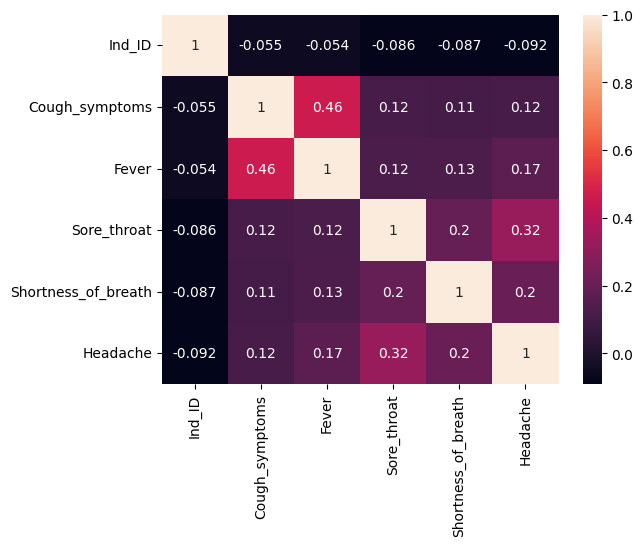

In [56]:
sns.heatmap(df.corr(),annot= True )

In [57]:
df.head()

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0       1  11-03-2020            True  False         True   
1       2  11-03-2020           False   True        False   
2       3  11-03-2020           False   True        False   
3       4  11-03-2020            True  False        False   
4       5  11-03-2020            True  False        False   

   Shortness_of_breath  Headache    Corona Age_60_above   Sex  \
0                False     False  negative           No  male   
1                False     False  positive           No  male   
2                False     False  positive           No  male   
3                False     False  negative           No  male   
4                False     False  negative           No  male   

            Known_contact  
0                  Abroad  
1                  Abroad  
2                  Abroad  
3                  Abroad  
4  Contact with confirmed

Convert Date to "Year" , "Month" & "Day"

In [58]:
df['date'] = pd.to_datetime(df['Test_date'], format="%d-%m-%Y")
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [59]:
df.head()

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0       1  11-03-2020            True  False         True   
1       2  11-03-2020           False   True        False   
2       3  11-03-2020           False   True        False   
3       4  11-03-2020            True  False        False   
4       5  11-03-2020            True  False        False   

   Shortness_of_breath  Headache    Corona Age_60_above   Sex  \
0                False     False  negative           No  male   
1                False     False  positive           No  male   
2                False     False  positive           No  male   
3                False     False  negative           No  male   
4                False     False  negative           No  male   

            Known_contact       date  day  month  year  
0                  Abroad 2020-03-11   11      3  2020  
1                  Abroad 2020-03-11   11      3  2020  
2                  Abroad 2020-03-11   11      3  2020  
3                  Abroad 2020-03-11   11      3  2020  
4  Contact with confirmed 2020-03-11   11      3  2020

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  object        
 2   Cough_symptoms       278848 non-null  bool          
 3   Fever                278848 non-null  bool          
 4   Sore_throat          278848 non-null  bool          
 5   Shortness_of_breath  278848 non-null  bool          
 6   Headache             278848 non-null  bool          
 7   Corona               278848 non-null  object        
 8   Age_60_above         278848 non-null  object        
 9   Sex                  278848 non-null  object        
 10  Known_contact        278848 non-null  object        
 11  date                 278848 non-null  datetime64[ns]
 12  day                  278848 non-null  int64         
 13  month         

Here we have data type of bool int and object. As model work in numerical dtype ,lets convert the column into numerical form.

Encoding all caetegrical variable to numerical using label encoder.


In [61]:
#fetching unique values of features
print(df['Cough_symptoms'].unique())
print(df['Fever'].unique())
print(df['Sore_throat'].unique())
print(df['Shortness_of_breath'].unique())
print(df['Headache'].unique())
print(df['Age_60_above'].unique())
print(df['Sex'].unique())
print(df['Known_contact'].unique())
print(df['Corona'].unique())

[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
['No' 'Yes']
['male' 'female']
['Abroad' 'Contact with confirmed' 'Other']
['negative' 'positive']


In [62]:
# importing labelencoder
from sklearn.preprocessing import LabelEncoder


In [63]:
# initializing
le  = LabelEncoder()
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact', 'date', 'day', 'month', 'year'],
      dtype='object')

As we have multiple categorical column to lable encode we will use apply method.

Reference link :  https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [64]:
encoding_col = list(df[['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact']])

In [65]:
df[encoding_col] = df[encoding_col].apply(le.fit_transform)

In [66]:
df.head()

Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0       1  11-03-2020               1      0            1   
1       2  11-03-2020               0      1            0   
2       3  11-03-2020               0      1            0   
3       4  11-03-2020               1      0            0   
4       5  11-03-2020               1      0            0   

   Shortness_of_breath  Headache  Corona  Age_60_above  Sex  Known_contact  \
0                    0         0       0             0    1              0   
1                    0         0       1             0    1              0   
2                    0         0       1             0    1              0   
3                    0         0       0             0    1              0   
4                    0         0       0             0    1              1   

        date  day  month  year  
0 2020-03-11   11      3  2020  
1 2020-03-11   11      3  2020  
2 2020-03-11   11      3  2020  
3 2020-03-11   11      3  2020  
4 2020-03-11   11      3  2020

In [67]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

In [68]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
date                       51
day                        31
month                       2
year                        1
dtype: int64

As we have converted Test_date to date column , we can delete test_date column

In [69]:
df.pop('Test_date')

0         11-03-2020
1         11-03-2020
2         11-03-2020
3         11-03-2020
4         11-03-2020
             ...    
278843    30-04-2020
278844    30-04-2020
278845    30-04-2020
278846    30-04-2020
278847    30-04-2020
Name: Test_date, Length: 278848, dtype: object

In [70]:
df.columns

Index(['Ind_ID', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact', 'date', 'day', 'month', 'year'],
      dtype='object')

In [71]:
df['year'].unique()

array([2020])

As we can see only 1 year is present so we can delete that too

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Cough_symptoms       278848 non-null  int64         
 2   Fever                278848 non-null  int64         
 3   Sore_throat          278848 non-null  int64         
 4   Shortness_of_breath  278848 non-null  int64         
 5   Headache             278848 non-null  int64         
 6   Corona               278848 non-null  int64         
 7   Age_60_above         278848 non-null  int64         
 8   Sex                  278848 non-null  int64         
 9   Known_contact        278848 non-null  int64         
 10  date                 278848 non-null  datetime64[ns]
 11  day                  278848 non-null  int64         
 12  month                278848 non-null  int64         
 13  year          

As we have independent variable ,we will check VIF for multicollinearity

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif_col = df[['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Vif_col.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Vif_col.values, i)
                          for i in range(len(Vif_col.columns))]

print(vif_data)

               feature       VIF
0       Cough_symptoms  1.441758
1                Fever  1.403320
2          Sore_throat  1.154562
3  Shortness_of_breath  1.081159
4             Headache  1.170445
5         Age_60_above  1.100818
6                  Sex  1.998987
7        Known_contact  1.980247


As we can see all the independent variable having VIF less than 5


Now, let's split the dataset into independent and dependent varible

In [74]:
df.columns

Index(['Ind_ID', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact', 'date', 'day', 'month', 'year'],
      dtype='object')

In [75]:
df

Ind_ID  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0            1               1      0            1                    0   
1            2               0      1            0                    0   
2            3               0      1            0                    0   
3            4               1      0            0                    0   
4            5               1      0            0                    0   
...        ...             ...    ...          ...                  ...   
278843  278844               0      0            0                    0   
278844  278845               0      0            0                    0   
278845  278846               0      0            0                    0   
278846  278847               0      0            0                    0   
278847  278848               0      0            0                    0   

        Headache  Corona  Age_60_above  Sex  Known_contact       date  day  \
0              0       0             0    1              0 2020-03-11   11   
1              0       1             0    1              0 2020-03-11   11   
2              0       1             0    1              0 2020-03-11   11   
3              0       0             0    1              0 2020-03-11   11   
4              0       0             0    1              1 2020-03-11   11   
...          ...     ...           ...  ...            ...        ...  ...   
278843         0       1             0    1              2 2020-04-30   30   
278844         0       0             0    0              2 2020-04-30   30   
278845         0       0             0    1              2 2020-04-30   30   
278846         0       0             0    1              2 2020-04-30   30   
278847         0       0             0    0              2 2020-04-30   30   

        month  year  
0           3  2020  
1           3  2020  
2           3  2020  
3           3  2020  
4           3  2020  
...       ...   ...  
278843      4  2020  
278844      4  2020  
278845      4  2020  
278846      4  2020  
278847      4  2020  

[278848 rows x 14 columns]

In [76]:
#As per our business requirement we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation.
#And , data from 16th April to 30th april as Test Set.
break_date = pd.Timestamp("2020-04-15")
df_train_valid = df[df['date'] <= break_date]
df_test = df[df['date'] > break_date]

In [77]:
df_train_valid

Ind_ID  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0            1               1      0            1                    0   
1            2               0      1            0                    0   
2            3               0      1            0                    0   
3            4               1      0            0                    0   
4            5               1      0            0                    0   
...        ...             ...    ...          ...                  ...   
163184  163185               0      0            0                    0   
163185  163186               0      0            0                    0   
163186  163187               0      0            0                    0   
163187  163188               0      0            0                    0   
163188  163189               0      0            0                    0   

        Headache  Corona  Age_60_above  Sex  Known_contact       date  day  \
0              0       0             0    1              0 2020-03-11   11   
1              0       1             0    1              0 2020-03-11   11   
2              0       1             0    1              0 2020-03-11   11   
3              0       0             0    1              0 2020-03-11   11   
4              0       0             0    1              1 2020-03-11   11   
...          ...     ...           ...  ...            ...        ...  ...   
163184         0       0             0    1              2 2020-04-15   15   
163185         0       0             0    1              2 2020-04-15   15   
163186         0       0             0    0              2 2020-04-15   15   
163187         0       0             0    1              2 2020-04-15   15   
163188         0       0             0    1              2 2020-04-15   15   

        month  year  
0           3  2020  
1           3  2020  
2           3  2020  
3           3  2020  
4           3  2020  
...       ...   ...  
163184      4  2020  
163185      4  2020  
163186      4  2020  
163187      4  2020  
163188      4  2020  

[163189 rows x 14 columns]

In [78]:
df_test

Ind_ID  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
163189  163190               1      0            0                    0   
163190  163191               0      0            0                    0   
163191  163192               1      0            0                    0   
163192  163193               0      0            0                    0   
163193  163194               0      0            0                    0   
...        ...             ...    ...          ...                  ...   
278843  278844               0      0            0                    0   
278844  278845               0      0            0                    0   
278845  278846               0      0            0                    0   
278846  278847               0      0            0                    0   
278847  278848               0      0            0                    0   

        Headache  Corona  Age_60_above  Sex  Known_contact       date  day  \
163189         0       0             0    0              0 2020-04-16   16   
163190         0       0             0    0              2 2020-04-16   16   
163191         0       0             0    0              0 2020-04-16   16   
163192         0       0             0    1              2 2020-04-16   16   
163193         0       0             0    1              2 2020-04-16   16   
...          ...     ...           ...  ...            ...        ...  ...   
278843         0       1             0    1              2 2020-04-30   30   
278844         0       0             0    0              2 2020-04-30   30   
278845         0       0             0    1              2 2020-04-30   30   
278846         0       0             0    1              2 2020-04-30   30   
278847         0       0             0    0              2 2020-04-30   30   

        month  year  
163189      4  2020  
163190      4  2020  
163191      4  2020  
163192      4  2020  
163193      4  2020  
...       ...   ...  
278843      4  2020  
278844      4  2020  
278845      4  2020  
278846      4  2020  
278847      4  2020  

[115659 rows x 14 columns]

## Separating Dataset into Training Set , Test Set and Validation Set

In [79]:
X_train = df_train_valid.drop(columns=['Ind_ID','date','day','month','year','Corona'],axis = 1)

In [80]:
X_train

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      1            0                    0         0   
2                    0      1            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
163184               0      0            0                    0         0   
163185               0      0            0                    0         0   
163186               0      0            0                    0         0   
163187               0      0            0                    0         0   
163188               0      0            0                    0         0   

        Age_60_above  Sex  Known_contact  
0                  0    1              0  
1                  0    1              0  
2                  0    1              0  
3                  0    1              0  
4                  0    1              1  
...              ...  ...            ...  
163184             0    1              2  
163185             0    1              2  
163186             0    0              2  
163187             0    1              2  
163188             0    1              2  

[163189 rows x 8 columns]

In [81]:
y_train = df_train_valid['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 163189, dtype: int64

In [82]:
X_test = df_test.drop(columns=['Ind_ID','date','day','month','year','Corona'],axis = 1)
X_test

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
163189               1      0            0                    0         0   
163190               0      0            0                    0         0   
163191               1      0            0                    0         0   
163192               0      0            0                    0         0   
163193               0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

        Age_60_above  Sex  Known_contact  
163189             0    0              0  
163190             0    0              2  
163191             0    0              0  
163192             0    1              2  
163193             0    1              2  
...              ...  ...            ...  
278843             0    1              2  
278844             0    0              2  
278845             0    1              2  
278846             0    1              2  
278847             0    0              2  

[115659 rows x 8 columns]

In [83]:
y_test = df_test['Corona']
y_test

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 115659, dtype: int64

In [84]:
# As we have to divide into 4:1 i.e 80 -20
from sklearn.model_selection import train_test_split

X_train,X_val , y_train , y_val = train_test_split(X_train,y_train, test_size = .20)

In [85]:
print(" X Train: ",X_train.shape)
print(" Y Train: ",y_train.shape)
print(" X Test: ",X_test.shape)
print(" Y Test: ",y_test.shape)
print(" X Val: ",X_val.shape)
print(" Y Val: ",y_val.shape)

 X Train:  (130551, 8)
 Y Train:  (130551,)
 X Test:  (115659, 8)
 Y Test:  (115659,)
 X Val:  (32638, 8)
 Y Val:  (32638,)


## Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 2.13300116,  3.10453206, -0.10875277, ..., -0.43420553,
         0.88943426, -2.71525754],
       [ 2.13300116,  3.10453206, -0.10875277, ..., -0.43420553,
         0.88943426, -2.71525754],
       [-0.468823  , -0.32210974, -0.10875277, ..., -0.43420553,
         0.88943426,  0.41618758],
       ...,
       [-0.468823  , -0.32210974, -0.10875277, ...,  2.30305682,
        -1.12431019,  0.41618758],
       [ 2.13300116,  3.10453206, -0.10875277, ..., -0.43420553,
         0.88943426,  0.41618758],
       [-0.468823  , -0.32210974, -0.10875277, ..., -0.43420553,
         0.88943426,  0.41618758]])

In [88]:
X_test = scaler.transform(X_test)
X_test

array([[ 2.13300116, -0.32210974, -0.10875277, ..., -0.43420553,
        -1.12431019, -2.71525754],
       [-0.468823  , -0.32210974, -0.10875277, ..., -0.43420553,
        -1.12431019,  0.41618758],
       [ 2.13300116, -0.32210974, -0.10875277, ..., -0.43420553,
        -1.12431019, -2.71525754],
       ...,
       [-0.468823  , -0.32210974, -0.10875277, ..., -0.43420553,
         0.88943426,  0.41618758],
       [-0.468823  , -0.32210974, -0.10875277, ..., -0.43420553,
         0.88943426,  0.41618758],
       [-0.468823  , -0.32210974, -0.10875277, ..., -0.43420553,
        -1.12431019,  0.41618758]])

## Applying Algorithm

Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix, classification_report , accuracy_score , recall_score ,classification_report,confusion_matrix
lr = LogisticRegression()

In [90]:
lr.fit(X_train,y_train)


LogisticRegression()

In [91]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9433095112254981
0.9764825910651138


As we can see above both the score are not necessarily a cause for concern, and it is a common scenario in machine learning

In [92]:
y_pred_lr = lr.predict(X_test)

In [93]:
accuracy_score_lr = accuracy_score(y_test,y_pred_lr)
precision_lr = precision_score(y_test,y_pred_lr)
recall_lr = recall_score(y_test,y_pred_lr)

Accuracy:  0.9764825910651138
Precision:  0.25
Recall:  0.00407709414381023
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    112961
           1       0.25      0.00      0.01      2698

    accuracy                           0.98    115659
   macro avg       0.61      0.50      0.50    115659
weighted avg       0.96      0.98      0.97    115659

Confusion Matrix: 
[[112928     33]
 [  2687     11]]


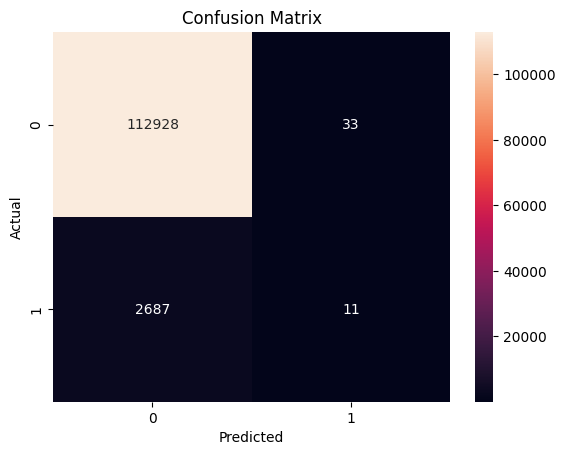

In [94]:
print("Accuracy: ", accuracy_score_lr)
print("Precision: ", precision_lr)
print("Recall: ", recall_lr)
print("Classification Report:")
print(classification_report(y_test,y_pred_lr))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred_lr))
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot = True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [96]:
Dt = DecisionTreeClassifier()

In [97]:
Dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [98]:
print(Dt.score(X_train,y_train))
print(Dt.score(X_test,y_test))


0.9564614595062466
0.9838058430385875


Similarly the decision tree socres are in merely difference

In [99]:
y_pred_dt = Dt.predict(X_test)

In [100]:
accuracy_score_dt = accuracy_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test,y_pred_dt)
recall_dt = recall_score(y_test,y_pred_dt)

Accuracy:  0.9838058430385875
Precision:  0.7708470124753776
Recall:  0.4351371386212009
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.44      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659

Confusion Matrix: 
[[112612    349]
 [  1524   1174]]


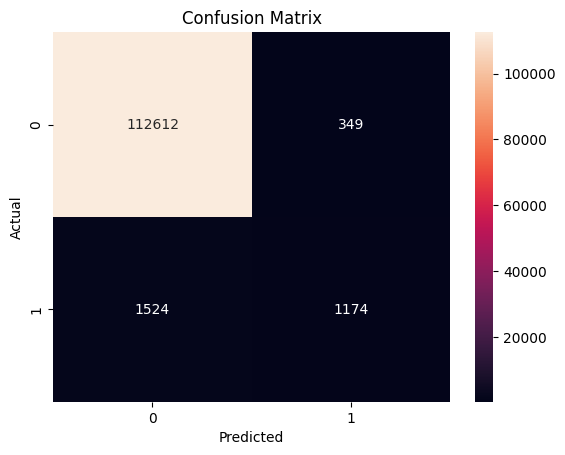

In [101]:
print("Accuracy: ", accuracy_score_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("Classification Report:")
print(classification_report(y_test,y_pred_dt))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred_dt))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot = True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [103]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [104]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))


0.9469019770051551
0.9752461978747871


For KNN classifier we get difference of around 3% between training and testing data that mean our model is performing good.

In [105]:
y_pred_knn = knn.predict(X_test)

In [106]:
accuracy_score_knn = accuracy_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test,y_pred_knn)
recall_knn = recall_score(y_test,y_pred_knn)

Accuracy:  0.9752461978747871
Precision:  0.45138479670005893
Recall:  0.2839140103780578
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    112961
           1       0.45      0.28      0.35      2698

    accuracy                           0.98    115659
   macro avg       0.72      0.64      0.67    115659
weighted avg       0.97      0.98      0.97    115659

Confusion Matrix: 
[[112030    931]
 [  1932    766]]


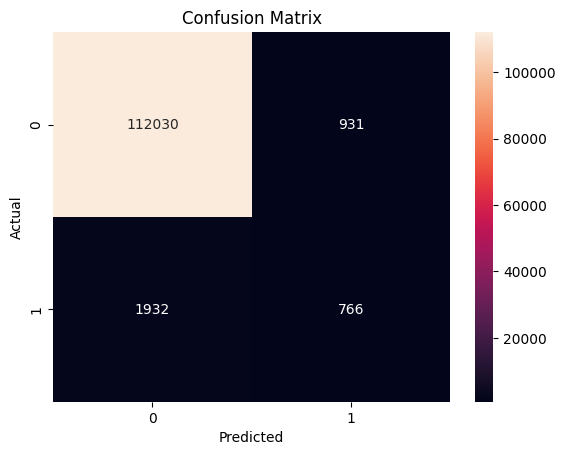

In [107]:
print("Accuracy: ", accuracy_score_knn)
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("Classification Report:")
print(classification_report(y_test,y_pred_knn))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred_knn))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot = True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
Rf = RandomForestClassifier()

In [119]:
Rf.fit(X_train,y_train)


RandomForestClassifier()

In [120]:
print(Rf.score(X_train,y_train))
print(Rf.score(X_test,y_test))


0.9564614595062466
0.9837971969323616


For Random Classifier we are getting difference of 3% between train and test data resulting modle is performing good

In [111]:
y_pred_rf = Rf.predict(X_test)

In [112]:
accuracy_score_rf = accuracy_score(y_test,y_pred_rf)
precision_rf = precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)

Accuracy:  0.9838058430385875
Precision:  0.7704918032786885
Recall:  0.43550778354336545
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.44      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659

Confusion Matrix: 
[[112611    350]
 [  1523   1175]]


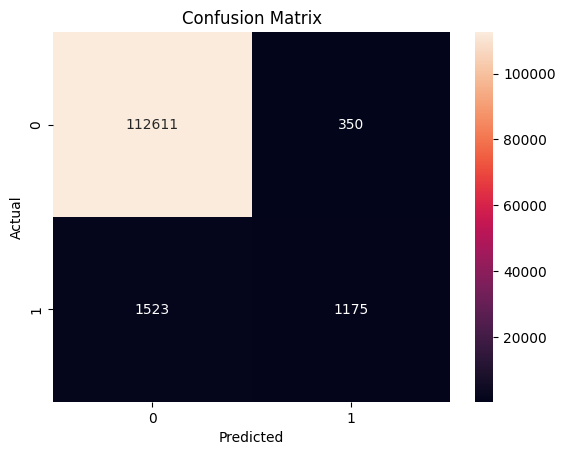

In [113]:
print("Accuracy: ", accuracy_score_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("Classification Report:")
print(classification_report(y_test,y_pred_rf))
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred_rf))
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot = True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [114]:
accuracy_df = pd.DataFrame({"Models":["Logistic Regression","Decision Tree","KNN","Random Forest"],
                            "Accuracy":[accuracy_score_lr,accuracy_score_dt,accuracy_score_knn,accuracy_score_rf],

                            })

In [115]:
accuracy_df

Models  Accuracy
0  Logistic Regression  0.976483
1        Decision Tree  0.983806
2                  KNN  0.975246
3        Random Forest  0.983806

In [116]:
fig = px.bar(accuracy_df, x="Accuracy", y="Models", orientation='h')
fig.show()

# Conclusion

- We are getting 97% accuracy using Decision Tree and RandomForest

- with Logistics regression and KNN we are getting 96% accuracy.
- So, for deployment we can use any model between best two.